Data From https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

| Feature         | Description                                                     |
|-----------------|-----------------------------------------------------------------|
| Age             | Age of the patient [years]                                      |
| Sex             | Sex of the patient [M: Male, F: Female]                         |
| ChestPainType   | Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] |
| RestingBP       | Resting blood pressure [mm Hg]                                 |
| Cholesterol     | Serum cholesterol [mm/dl]                                     |
| FastingBS       | Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] |
| RestingECG      | Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] |
| MaxHR           | Maximum heart rate achieved [Numeric value between 60 and 202] |
| ExerciseAngina  | Exercise-induced angina [Y: Yes, N: No]                         |
| Oldpeak         | Oldpeak = ST [Numeric value measured in depression]             |
| ST_Slope        | The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] |
| HeartDisease    | Output class [1: heart disease, 0: Normal]                     |


In [43]:
# importanto as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
import pandas as pd

# importando o dataset
df = pd.read_csv('heart.csv')

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [27]:
# variaveis independentes
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
# variavel dependente
y = df['HeartDisease']

# convertendo variaveis categoricas em variaveis dummy por serem variaveis categoricas
X = pd.get_dummies(X, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# criando o modelo de regressão linear
model = LinearRegression()

# fit do modelo
model.fit(X_train, y_train)

# fazendo a previsão
y_pred = model.predict(X_test)

In [28]:
# convertendo as previsões em binario pois a predição é um valor continuo e a variavel dependente é binaria
y_pred_binary = (y_pred > 0.5).astype(int)

# avaliando o modelo
mse = mean_squared_error(y_test, y_pred_binary)
r2 = r2_score(y_test, y_pred_binary)

print("Binary Mean Squared Error:", mse)
print("Binary R-squared:", r2)

Binary Mean Squared Error: 0.15760869565217392
Binary R-squared: 0.3523485859934459


In [44]:
# coeficientes e intercepto
coefficients = model.coef_
intercept = model.intercept_

# criando um dataframe com os coeficientes
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

Cada coeficiente corresponde à quantidade que influencia o valor predito, que neste caso é a chance de ter uma Doença Cardíaca. Vamos explicar como esses coeficientes funcionam com alguns exemplos:

- Idade (Age): Para cada aumento de 1 ano na idade, a chance de ter uma Doença Cardíaca aumenta em 0,1961%. Por exemplo, se uma pessoa tem 30 anos de idade, seu risco aumentaria em 6% apenas devido à idade.

- Pressão Arterial em Repouso (RestingBP): Cada aumento de 1 unidade na pressão arterial em repouso contribui com um aumento de 0,005% na chance de ter uma Doença Cardíaca.

- Colesterol (Cholesterol): Cada aumento de 1 unidade no nível de colesterol reduz a chance de ter uma Doença Cardíaca em 0,0585%.

- Glicose em Jejum (FastingBS): A presença de glicose em jejum contribui com um aumento de 12,0537% na chance de ter uma Doença Cardíaca.

- Frequência Cardíaca Máxima (MaxHR): Cada aumento de 1 unidade na frequência cardíaca máxima diminui a chance de ter uma Doença Cardíaca em 0,0770%.

- Depressão do Segmento ST (Oldpeak): Cada aumento de 1 unidade na depressão do segmento ST aumenta a chance de ter uma Doença Cardíaca em 5,7961%.

Abaixo estão o resto dos coeficientes para cada variável:

In [45]:
# plotando o grafico de barras com os coeficientes
print(coefficients_df)
print("Intercept:", intercept)

              Feature  Coefficient
0                 Age     0.001961
1           RestingBP     0.000050
2         Cholesterol    -0.000585
3           FastingBS     0.120537
4               MaxHR    -0.000770
5             Oldpeak     0.057961
6               Sex_F    -0.070028
7               Sex_M     0.070028
8   ChestPainType_ASY     0.135640
9   ChestPainType_ATA    -0.061431
10  ChestPainType_NAP    -0.061076
11   ChestPainType_TA    -0.013133
12     RestingECG_LVH     0.020998
13  RestingECG_Normal    -0.001053
14      RestingECG_ST    -0.019945
15   ExerciseAngina_N    -0.084179
16   ExerciseAngina_Y     0.084179
17      ST_Slope_Down     0.017811
18      ST_Slope_Flat     0.177287
19        ST_Slope_Up    -0.195098
Intercept: 0.4931792363735487


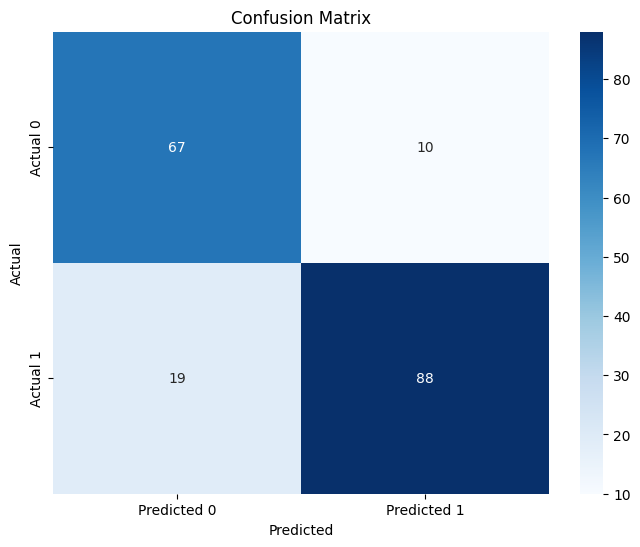

In [47]:
# calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# criando o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
# extrair os valores da matriz de confusão
tn, fp, fn, tp = conf_matrix.ravel()

# imprimir os valores da matriz de confusão
print(f"Predicted 0 (Non-Heart Disease): {(tn)} cases")
print(f"Predicted 1 (Heart Disease): {tp} cases")
print(f"Incorrectly Predicted Total: {fp + fn} cases")

# calcular a acuracia
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy:.2%}")

Predicted 0 (Non-Heart Disease): 67 cases
Predicted 1 (Heart Disease): 88 cases
Incorrectly Predicted Total: 29 cases
Accuracy: 84.24%


Com um test size de 20% O modelo Conseguiu uma acuracia significativa de 84% aprox. E também um Erro Médio Quadratico de 15% junto com o R-Quadrado sendo 35% que indica que o modelo não teve muito erro na sua predição.